In [40]:
%pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Create a dataset with 10,000 samples
X,y = make_circles(n_samples = 10000,
                   noise = 0.005,
                   random_state= 42)

In [42]:
X.shape

(10000, 2)

In [43]:
y.shape

(10000,)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=142)

In [45]:
print("Original X shape:", np.array(X).shape)
print("Original y shape:", np.array(y).shape)


Original X shape: (10000, 2)
Original y shape: (10000,)


In [46]:
X_train.shape

(7500, 2)

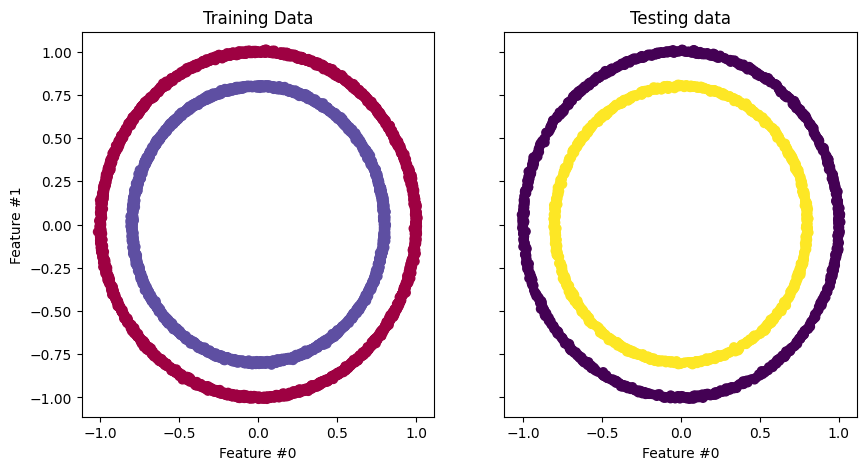

In [47]:
# Visusalize the data
fig, (train_ax, test_ax) = plt.subplots(ncols = 2, sharex=True, sharey=True, figsize=(10, 5))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
train_ax.set_title("Training Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")
plt.show()

In [48]:
# Convert the training and test data from the Numpy arrays to the Pytorch tensors

import warnings
warnings.filterwarnings("ignore")

%pip install torch -q

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Convert data to torch tensors
X_test = np.array(X_test)
y_test = np.array(y_test)

class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len
    
batch_size = 64

# Instantiate the training and test data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)


# Check if it's working
for batch, (X,y) in enumerate(train_dataloader):
    print(f"Batch: {batch + 1}")
    print(f"X_shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break    

Batch: 1
X_shape: torch.Size([64, 2])
y shape: torch.Size([64])


In [50]:
# Neural Network Implementation in Pytorch

import torch
from torch import nn
from torch import optim

input_dim = 2
hidden_dim = 10
output_dim =1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x
    
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [51]:
learning_rate = 0.1

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [52]:
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())

print("Training Complete")

Training Complete


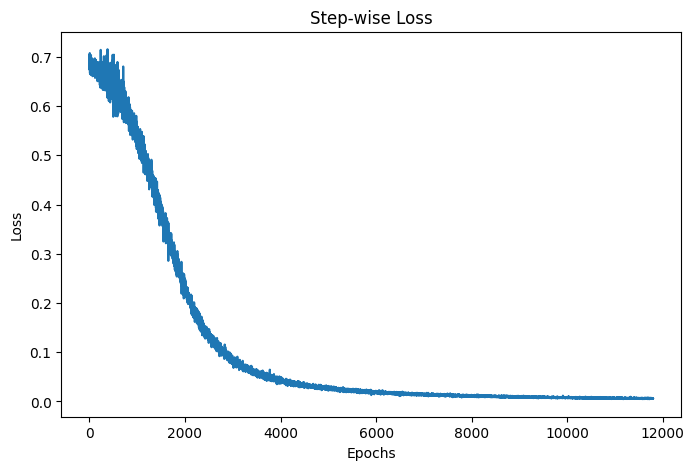

In [53]:
step = range(len(loss_values))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [54]:
print("X_test shape:", np.array(X_test).shape)
print("y_test shape:", np.array(y_test).shape)


X_test shape: (2500, 2)
y_test shape: (2500,)


In [56]:
import itertools 

# Initialize required variables
y_pred = []
y_test = []
correct = 0
total = 0

"""
We're not training so we don't need to calculate the gradients for our outputs
"""
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)  # Get model outputs
        predicted = np.where(outputs.numpy() < 0.5, 0, 1)  # Convert to NumPy and apply threshold
        predicted = list(itertools.chain(*predicted))  # Flatten predictions
        y_pred.append(predicted)  # Append predictions
        y_test.append(y.numpy())  # Append true labels as NumPy
        total += y.size(0)  # Increment total count
        correct += (predicted == y.numpy()).sum().item()  # Count correct predictions

print(f'Accuracy of the network on the 3300 test instances: {100 * correct // total}%')


Accuracy of the network on the 3300 test instances: 100%


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 19.3 MB/s eta 0:00:00 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [seaborn]m3/4 [seaborn]
Note: you may need to restart the kernel to use updated packages.
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1239
         1.0       1.00      1.00      1.00      1261

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



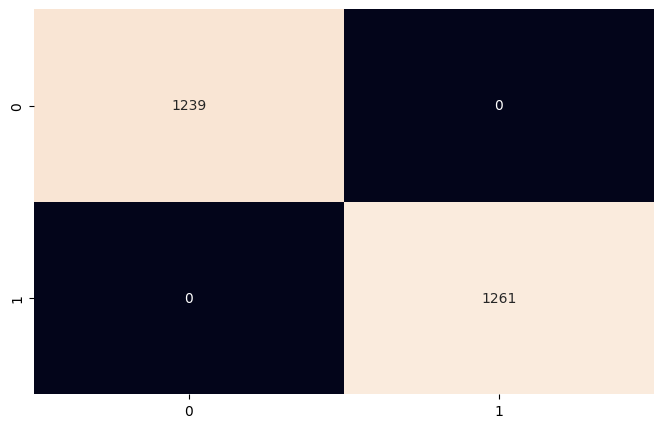

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%pip install seaborn
import seaborn as sns

y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))

print(classification_report(y_test, y_pred))

"""
              precision    recall  f1-score   support

        0.0       0.98      0.97      0.98      1635
        1.0       0.98      0.98      0.98      1665

    accuracy                           0.98      3300
  macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300

"""

cf_matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()